In [ ]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
from __future__ import print_function
import numpy as np
import argparse
import cv2


#Transformation Matrix#
MsRGB  = np.zeros((3,3), dtype='float')
MHPE   = np.zeros((3,3), dtype='float')
Sp     = np.zeros((3,3), dtype='float')


MsRGB = np.array([[0.4124564, 0.3575761, 0.1804375],
                  [0.2126729, 0.7151522, 0.0721750],
                  [0.0193339, 0.1191920, 0.9503041]])

MHPE = np.array([[ 0.4002, 0.7076, -0.0808],
                 [-0.2263, 1.1653,  0.0457],
                 [      0,      0,  0.9182]])

Sp   = np.array([[0, 1.05118294, -0.05116099],
                [0, 1         , 0          ],
                [0, 0         , 1          ]])

Trgb2lms = MHPE @ MsRGB
Tlms2rgb = np.linalg.inv(Trgb2lms)

In [ ]:
imgpath = '/content/drive/MyDrive/Infosys Internship/Datasets/10images.real/image_00369.jpg'
imgIN = cv2.imread(imgpath,cv2.IMREAD_UNCHANGED)
imgINrgb = cv2.cvtColor(imgIN, cv2.COLOR_BGR2RGB)

In [ ]:
x,y,z = imgINrgb.shape
imgLMS = np.zeros((x,y,z), dtype='float')

imgReshaped = imgINrgb.transpose(2, 0, 1).reshape(3,-1)
imgLMS = Trgb2lms @ imgReshaped #Convert to LMS


imgM=Sp @ imgLMS

imgOUT1=Tlms2rgb @ imgM  #converting simulation image to RGB
#imgOUT = Tlms2rgb @ imgLMS #Convert back to RGB


imgLMS = imgLMS.reshape(z, x, y).transpose(1, 2, 0).astype(np.uint8)
#imgOUT = imgOUT.reshape(z, x, y).transpose(1, 2, 0).astype(np.uint8)
imgOUT1 = imgOUT1.reshape(z, x, y).transpose(1, 2, 0).astype(np.uint8)
#imgOUT = cv2.cvtColor(imgOUT, cv2.COLOR_RGB2BGR)
imgOUT1 = cv2.cvtColor(imgOUT1, cv2.COLOR_RGB2BGR)

In [ ]:
def adjust_gamma(imgOUT1, gamma=1.0):
	# build a lookup table mapping the pixel values [0, 255] to
	# their adjusted gamma values
	invGamma = 1.0 / gamma
	table = np.array([((i / 255.0) ** invGamma) * 255
		for i in np.arange(0, 256)]).astype("uint8")
	# apply gamma correction using the lookup table
	return cv2.LUT(imgOUT1, table)

gammaImg = adjust_gamma(imgOUT1, 2.0)


In [ ]:
#ap = argparse.ArgumentParser()
#ap.add_argument("-i", "--image /content/drive/MyDrive/Infosys Internship/Datasets/10images.real/image_00369.jpg", required=True,
# help="path to input image")
# args = vars(ap.parse_args())
# # load the original image
# original = cv2.imread(args["image"])
 
# for gamma in np.arange(0.0, 3.5, 0.5):
# 	# ignore when gamma is 1 (there will be no change to the image)
# 	if gamma == 1:
# 		continue
# 	# apply gamma correction and show the images
# 	gamma = gamma if gamma > 0 else 0.1
# 	adjusted = adjust_gamma(original, gamma=gamma)
# 	cv2.putText(adjusted, "g={}".format(gamma), (10, 30),
# 		cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 0, 255), 3)
# 	cv2.imshow("Images", np.hstack([original, adjusted]))
# 	cv2.waitKey(0)

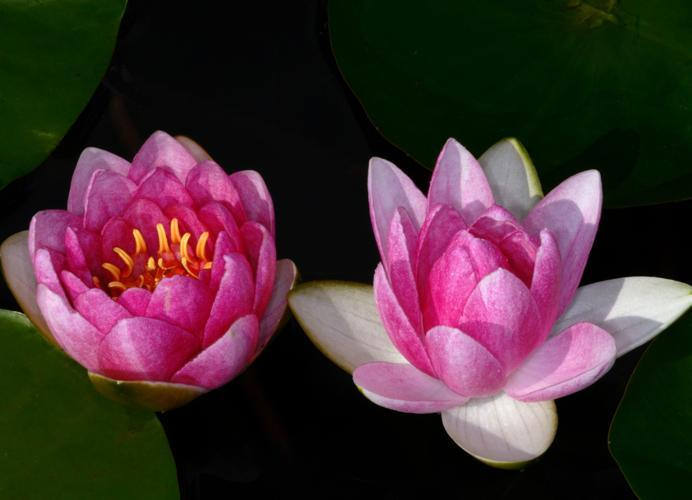

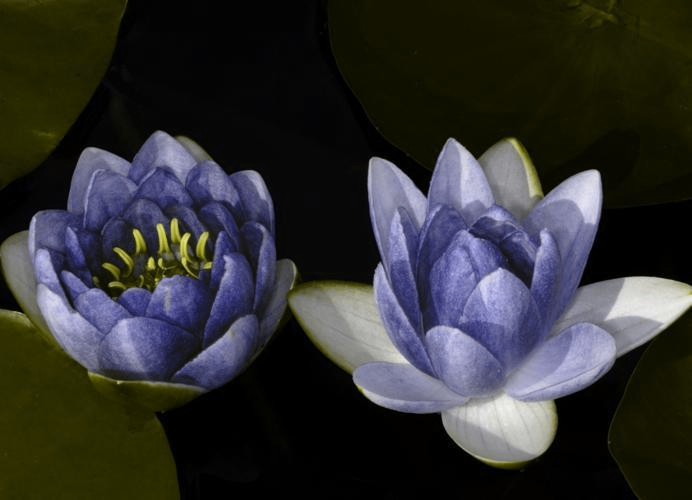

In [ ]:

cv2_imshow(imgIN)
#cv2_imshow(imgLMS)
cv2_imshow(imgOUT1)
#cv2_imshow(imgOUT)
cv2.waitKey(0)
cv2.destroyAllWindows()